### HW1 Problem Set

*Needs to be run on machine that can handle jupyter kernels (not smiller2)*

In [1]:
import numpy as np
from IPython.display import display
from PIL import Image

**1. ISS Overflight Problem: ISS overpass around 0030 UTC on 3 Dec.**

*Done using 1.instructions.txt*
    
1a. Compute the ground track over Colorado.

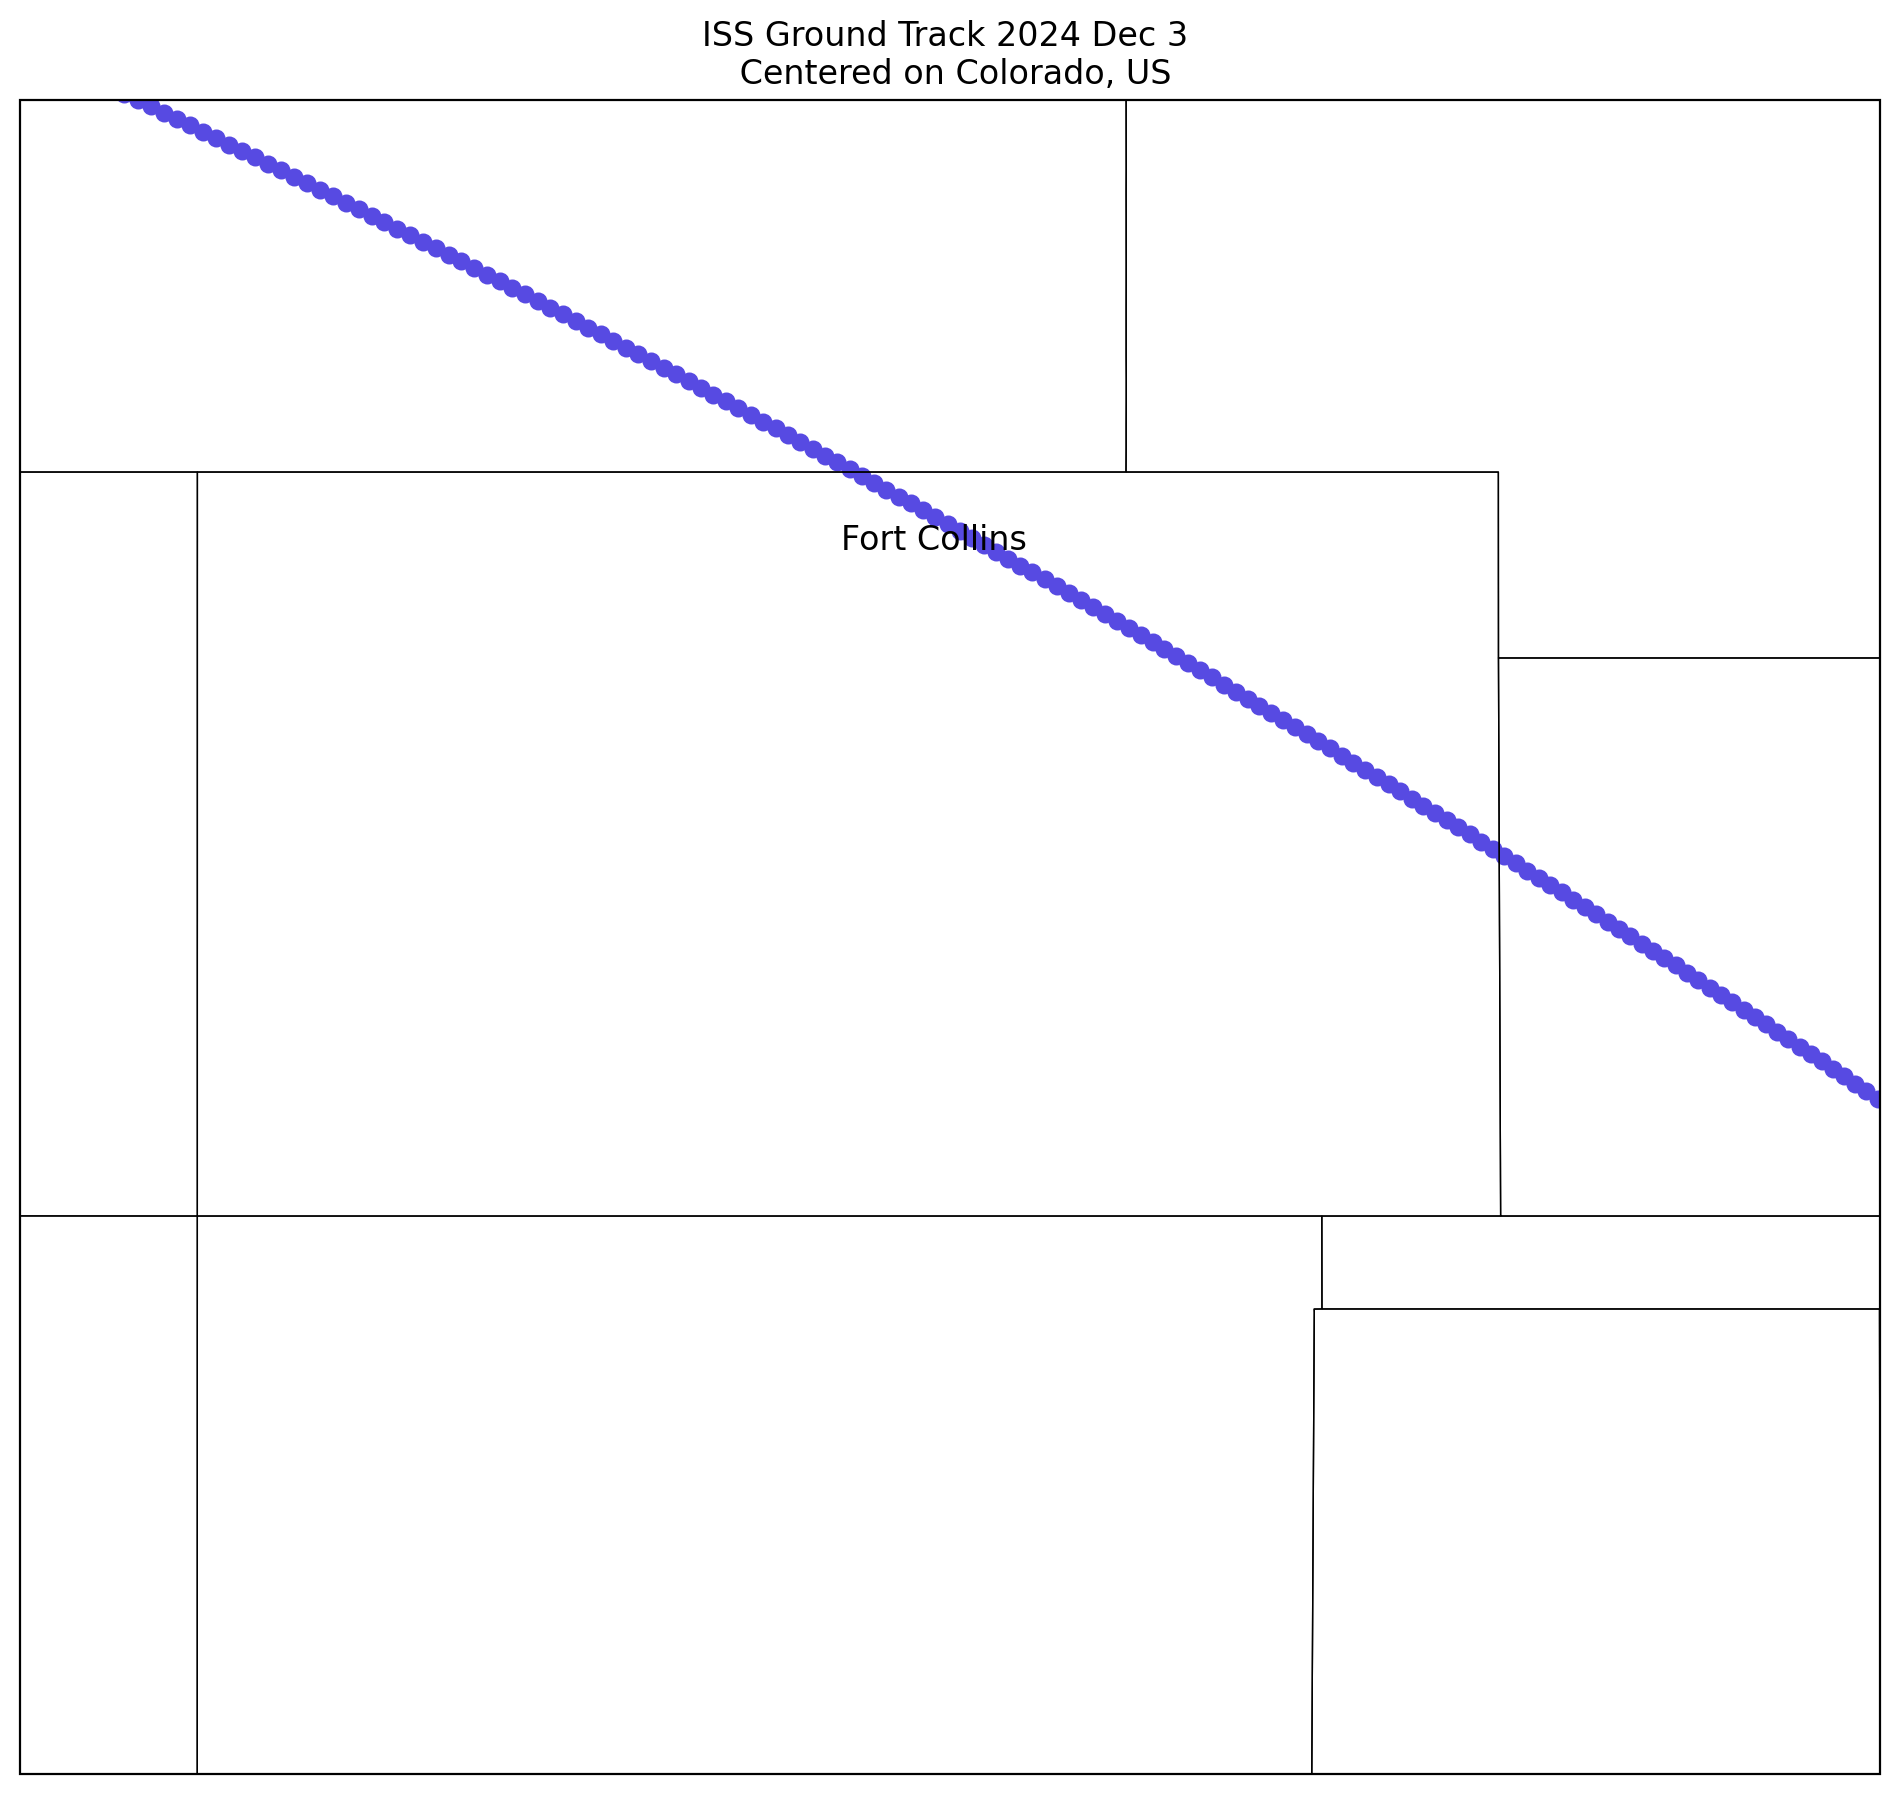

In [4]:
image_path = "results/ephemeris_plot_CO.png"
display(Image.open(image_path))

1b. From Fort Collins, compute the elevation and azimuth angles for this ISS overpass for +/- 5 minutes about the time of the maximum elevation angle.

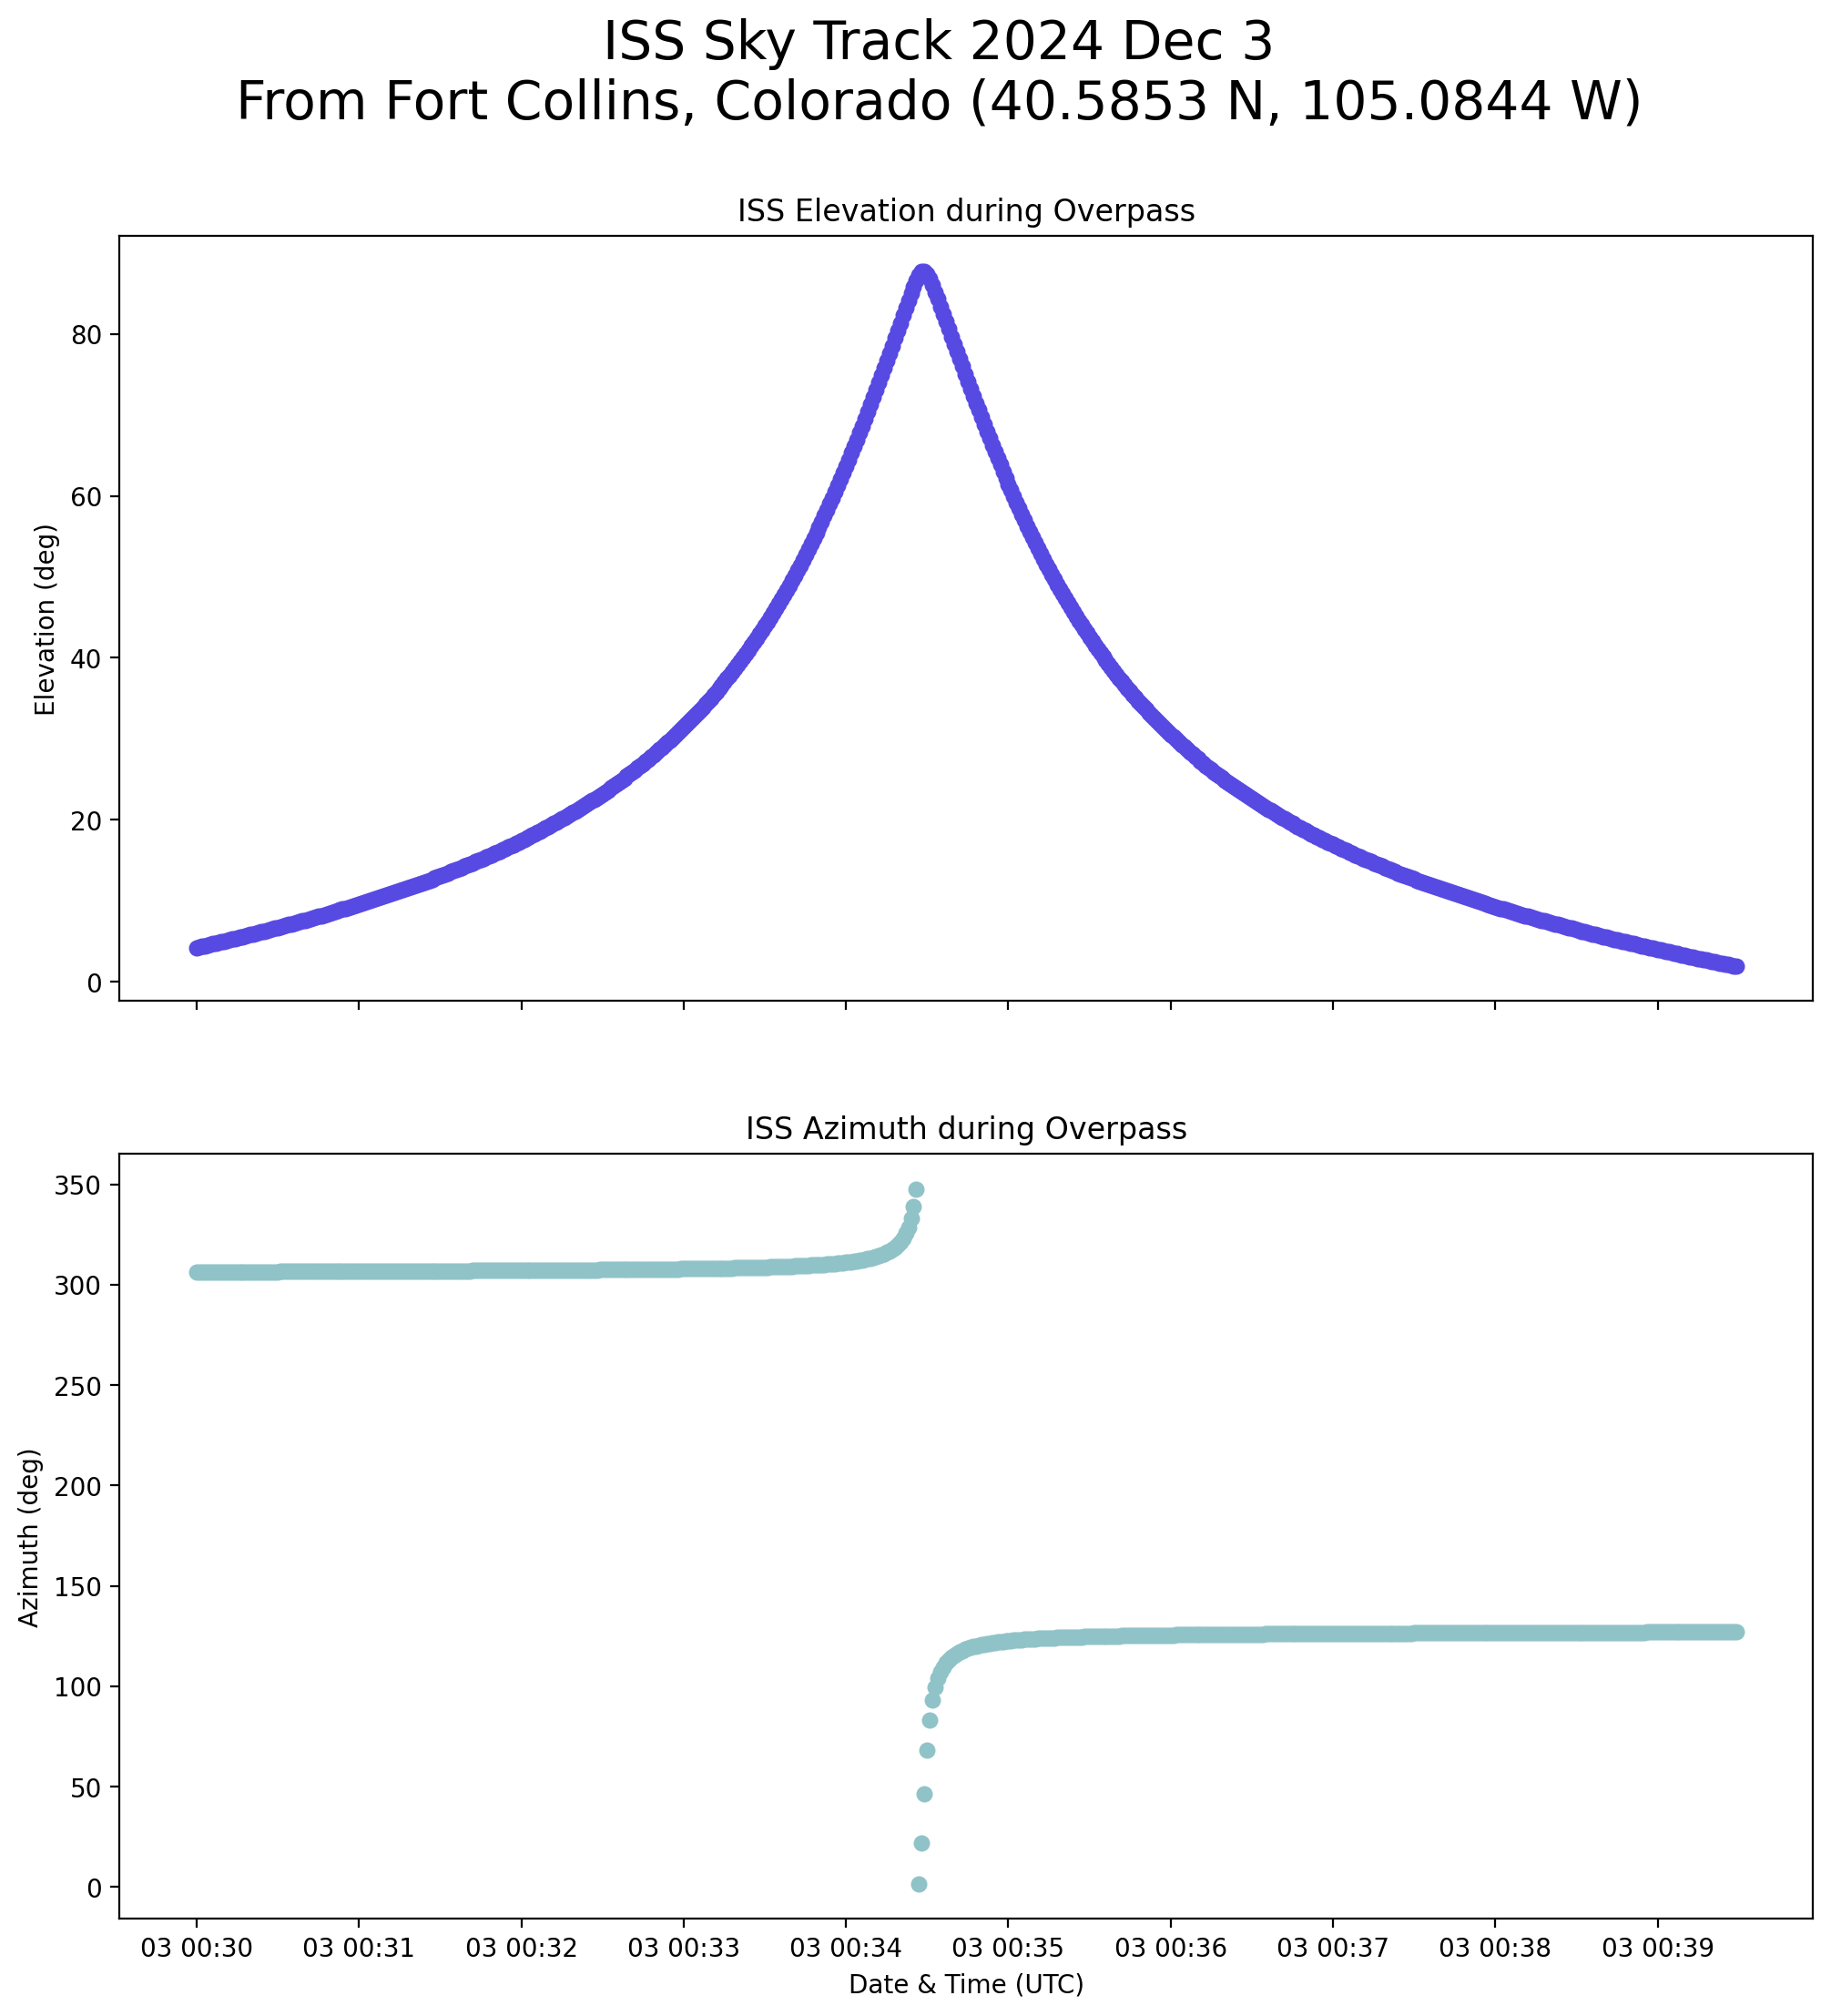

In [5]:
image_path = "results/track_plot_Fort_Collins.png"
display(Image.open(image_path))

2. Using a high-powered telescope, you measure the distance between a planet and one of its
moons as $1.22185*10^6$ km (mass center to mass center). Next, you measure the time
required for that moon to complete one orbit around the planet as $15.94$ days. Using these
data, what is the approximate mass of the planet?


Starting from the law of acceleration: 
$$
F = ma
$$

We can derive the equation for centripetal force: 
$$
F_c = \frac{mv^2}{r}
$$

Then create the equation for orbital velocity, where $m$ is the mass of the central body: 
$$
v = \sqrt{\frac{Gm}{r}}
$$

Now we simply have to replace the velocity term with a time term for orbital period:
$$
T = 2\pi \sqrt{\frac{r^3}{Gm}}
$$

And calculate for the mass of the planet (central body):
$$
m = \frac{r^3}{G} \left(\frac{2\pi}{T}\right)^2
$$


In [3]:
r = 1.22185e6 * 1000 #m
G = 6.674e-11 #m3 kg-1 s-2
T = 15.94 * 24 * 60 * 60 #s

m = (r**3)/G * (2*np.pi)
print("Mass of the planet (m):", m, " kg")

Mass of the planet (m): 1.7173046486431942e+38  kg


3. Consider two satellites (A and B) flying in circular orbits, in the same orbital plane, and
traveling in the same direction. Satellite B is two times further away from the center of
Earth than Satellite A. At initial time, both satellites are perfectly aligned (Satellite B is
directly “above” Satellite A). Time elapses. Where is Satellite B in its orbit at the moment
that Satellite A completes its first full orbit?

According to Kepler's second law, the two satellites will sweep out equal areas during the time it takes for Satellite A to complete its first orbit. 

Therefore, the following applies, based on the area of a circle. Here, $r$ is the orbit radius of Satellite A, and X is the fraction of the orbit completed by Satellite B. 
$$
\pi r^2 = X \pi (2r)^2
$$

$$
r = \sqrt{X} (2r)
$$

$$
\left(\frac{1}{2}\right)^2 = X
$$

Satellite B is one quarter through its orbit when Satellite A completes a full orbit. 

4. NASA Aqua flies at an altitude of 705 km, and Suomi-NPP flies at an altitude of 824 km.
Both satellites fly in sun-synchronous orbits in the 1330 LTAN orbital plane. Consider at
initial time these two satellites being perfectly aligned, as in Problem 3. How much time
elapses before the two satellites are perfectly aligned once again?

Since the two satellites are in sun-synchronous orbits and the same orbital plane, we are looking for the time it takes the lower-altitude satellite to "lap" the higher one. We do not have to worry about the satellites drifting into unique orbital planes. 

Calculating the radius of orbit from the center of the Earth: 
$$
r_A = 6378 + 705 \text{ km}
$$
$$
r_S = 6378 + 824 \text{ km}
$$

Calculating the orbital periods using the equation from Problem 2:
$$
T = 2\pi \sqrt{\frac{r^3}{Gm}}
$$

In [8]:
r_A = (6378 + 705) * 1000 #m
r_S = (6378 + 824) * 1000 #m
G = 6.674e-11 #m3 kg-1 s-2
m = 5.972e24 #kg

T_A = 2 * np.pi * np.sqrt((r_A**3)/(G*m))
T_S = 2 * np.pi * np.sqrt((r_S**3)/(G*m))
print("Orbital period of NASA Aqua: ", round(T_A/60, 2), " min")
print("Orbital period of Suomi-NPP: ", round(T_S/60, 2), " min")

Orbital period of NASA Aqua:  98.88  min
Orbital period of Suomi-NPP:  101.38  min


Since the orbital period is time per orbit, we can convert to a speed (orbits per time) with $\frac{1}{T}$. We can then take the difference between the two speeds to get the *relative* speed. 

The time it takes to do one orbit for the relative speed between the two satellites: 
$$
T_{\text{lap}} = \frac{1}{\frac{1}{T_A}-\frac{1}{T_S}}
$$

In [12]:
T_lap = 1/((1/T_A)-(1/T_S))
print("Time for NASA Aqua to 'lap' Suomi-NPP: ", round(T_lap/(60*60*24), 2), " days")

Time for NASA Aqua to 'lap' Suomi-NPP:  2.78  days


5. a)  For a sun-synchronous 1200 LTAN orbit, what are the values of the right ascension of the
ascending node on the days of i) Vernal Equinox, ii) Summer Solstice, iii) Fall Equinox, and iv)
Winter Solstice? Remember that the right-ascension/declination coordinate system is fixed
with respect to the stars.

The right ascension of the ascending node ($\Omega$) is an angle between the ascending node and the vernal equinox. Therefore, at the vernal equinox, $\Omega=0^\circ$. Since a sun-synchronous satellite precesses with Earth's orbit around the Sun, the $\Omega$ value should synchronize to the solar seasons. Extrapolating this to each of the solar quarters:
* Vernal equinox:   $\Omega=0^\circ$
* Summer solstice:  $\Omega=90^\circ$
* Fall equinox:     $\Omega=180^\circ$
* Winter solstice:  $\Omega=270^\circ$


5. b) Same question as part (a), but now for an asynchronous LEO satellite with $i = 90^\circ$ and a
1200 LTAN on the day of the Vernal Equinox. What is the LTAN for this orbit on the day of
the Fall Equinox?

The LTAN is the "local time for the ascending node" and will change for a non-sun-synchronous satellite. 